# Sea Ice Observations 

We will use Pandas to read in and plot data from the National Snow and Ice Data Center (NSIDC). You will learn how to read in sea ice data files using Pandas and perform basic calculations with the data set. Then, you will plot and analyze the data.


## 1. Downloading Data 
How to download sea ice data from NSIDC:
https://nsidc.org/data/user-resources/help-center/how-access-data-using-ftp-client-command-line-wget-or-python

How to determine the FTP address:
https://nsidc.org/data/user-resources/help-center/how-access-data-using-ftp-client-command-line-wget-or-python

We will be using "Sea Ice Index, Version 3." Directory:
https://noaadata.apps.nsidc.org/NOAA/G02135/

Find directory for northern hemisphere -> daily -> data and download <br />
N_seaice_extent_daily_v3.0.csv

Upload the above file to your jupyter server.  This file contains Arctic sea ice extent for every other day from October 26, 1978 - August 20, 1987 and daily Arctic sea ice extent from August 21, 1987 - present.



In [1]:
# plot_nsidc_seaice
# plots sea ice extent from the National Snow and Ice Data Center (NSIDC)
#
# Steven Cavallo
# September 2024

## 2. Header and Imports 
Edit the header describing the program above to make this ***your*** code.

Use the first cell below for your imports and import pandas.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

The below cell sets the filename and defines other constants.  We will define a list called year_range that sets the year interval for the plot.  

In [3]:
fdir = '/Users/scavallo/Documents/Work/Research/Students/Capstone_2024/data/'
filename_in = 'N_seaice_extent_daily_v3.0.csv' # Name of the file
year_range = [1979,2023] # Range of years that you will want to plot data.  The first index is the start year, and the second index is the end year.

## 3. Reading in the data 
Now read in the sea ice data using read_csv().  You will only need the columns that contain the Year, Month, Day, and Extent.  Extent is the sea ice extent, in millions of square kilometers.  

This will be similar to how you read in mesonet data, except that you will also need to include names=['Year', 'Month', 'Day', 'Extent'] in the argument.

In [4]:
icedata = pd.read_csv(fdir+filename_in,header=0,usecols=[0,1,2,3],skiprows=[1],names=['Year', 'Month', 'Day', 'Extent'])
print(icedata)

       Year  Month  Day  Extent
0      1978     10   26  10.231
1      1978     10   28  10.420
2      1978     10   30  10.557
3      1978     11    1  10.670
4      1978     11    3  10.777
...     ...    ...  ...     ...
15101  2024      9    6   4.294
15102  2024      9    7   4.213
15103  2024      9    8   4.289
15104  2024      9    9   4.308
15105  2024      9   10   4.306

[15106 rows x 4 columns]


## 4. Extracting September Sea Ice 
The minimum Arctic sea ice extent occurs annually in the month of September.  Thus, the September sea ice extent is a good measure of how fast sea ice is declining in the Arctic.  In the cell below, extract just the sea ice extent data for the month of September over the entire record.

In [5]:
icedata['Extent'].describe()
september_ice = icedata[ (icedata['Month']==9)]
march_ice = icedata[icedata['Month']==3]
print(september_ice)

       Year  Month  Day  Extent
155    1979      9    1   7.228
156    1979      9    3   7.147
157    1979      9    5   7.037
158    1979      9    7   7.075
159    1979      9    9   7.092
...     ...    ...  ...     ...
15101  2024      9    6   4.294
15102  2024      9    7   4.213
15103  2024      9    8   4.289
15104  2024      9    9   4.308
15105  2024      9   10   4.306

[1240 rows x 4 columns]


## 5. Make a list of years 
In the cell below, create a new list called 'sept_min_seaice.'  

Make a for loop to go through the range of years that you want to plot using year_range that you set above.
In each loop iteration, find the minimum sea ice extent for that particular year, and add that value to the sept_min_seaice list.


In [6]:
sept_min_seaice = []
march_max_seaice = []
for yearnow in range(year_range[0],year_range[1]+1):
    icenow_sept = september_ice[september_ice['Year']==yearnow]
    sept_min_seaice.append(icenow_sept['Extent'].min())
    
    icenow_march = march_ice[march_ice['Year']==yearnow]
    march_max_seaice.append(icenow_march['Extent'].max())    

print(sept_min_seaice)

[6.895, 7.533, 6.902, 7.16, 7.204, 6.396, 6.486, 7.122, 6.89, 7.048, 6.888, 6.011, 6.259, 7.159, 6.161, 6.934, 6.012, 7.147, 6.602, 6.293, 5.676, 5.943, 6.567, 5.625, 5.969, 5.77, 5.314, 5.746, 4.147, 4.548, 5.047, 4.59, 4.333, 3.34, 5.04, 4.988, 4.387, 4.145, 4.635, 4.63, 4.166, 3.793, 4.757, 4.692, 4.213]


## 6. Creating a Pandas Series for the minimum September Sea Ice 
Create a Pandas Series for the data in the list sept_min_seaice.  Add all the corresponding years as the index.

In [7]:
seaice_series_sept = pd.Series(sept_min_seaice)
seaice_series_march = pd.Series(march_max_seaice)
years = list(range(year_range[0],year_range[1]+1,1))
seaice_series_sept.index = years
seaice_series_march.index = years

## 7.  Create a trend line

Overlay the trend line.  The trend is a linear fit to the data, i.e., y = mx + b.

Statistical significance is given by the p-value.  For 95% confidence, p needs to be less than 0.05; for 99%, p needs to be less than 0.01

In [8]:
trend_plot_input = np.array(seaice_series_sept)
years_input = np.array(years).astype('int')

slope, intercept, r_value, p_value, std_err = stats.linregress(years_input[~np.isnan(trend_plot_input)],trend_plot_input[~np.isnan(trend_plot_input)])
trend_plot = slope*years_input + intercept
print("The p-value for the trend in SLP is %10.3Ef" %p_value)

seaice_trend = pd.Series(trend_plot)
seaice_trend.index = years


The p-value for the trend in SLP is  1.140E-16f


## 8. Plotting 
Plot the Pandas Series you just created above.  Make the line a solid blue with square markers.  Have it plot every 5th year on the x-axis.  Add an appropriate title and labels for the x- and y-axes.  To find the units of sea ice extent, look at the second row of the native input file. 

<Axes: title={'center': 'September Minimum Sea Ice Extent'}, xlabel='Year', ylabel='Extent (millions of km$^2$)'>

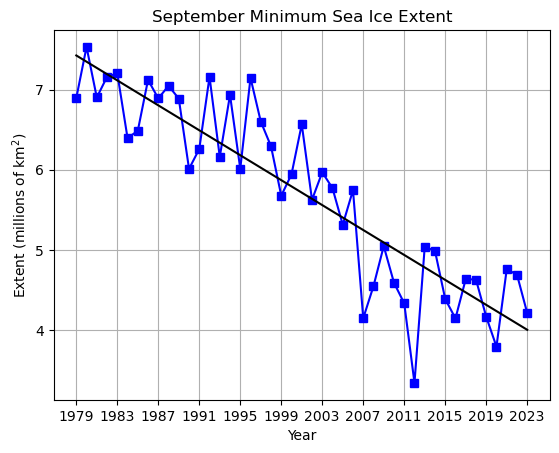

In [9]:
seaice_series_sept.plot(c='blue',ls='-',marker='s',xlabel="Year",title='September Minimum Sea Ice Extent',xticks=years[::4],ylabel='Extent (millions of km$^2$)',grid=True)
seaice_trend.plot(c='black',ls='-',xlabel="Year",xticks=years[::4],ylabel='Extent (millions of km$^2$)',grid=True)


The maximum Arctic sea ice extent occurs annually in the month of March.  Make another plot, similar to the last plot but instead plot the maximum March Arctic sea ice extent.  The only plotting style differences for this plot is to plot the maximum March extent with a solid red line and the + symbol for markers.

<Axes: title={'center': 'March Maximum Sea Ice Extent'}, xlabel='Year', ylabel='Extent (millions of km$^2$)'>

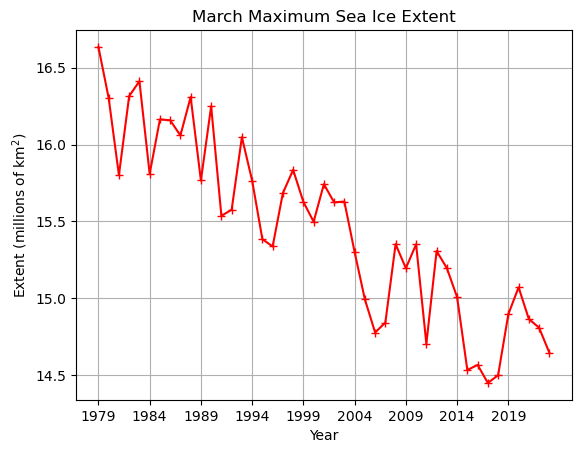

In [10]:

seaice_series_march.plot(c='red',ls='-',marker='+',xticks=years[::5],xlabel="Year",title='March Maximum Sea Ice Extent',ylabel='Extent (millions of km$^2$)',grid=True)